<a href="https://colab.research.google.com/github/ha-yun/GSTEC/blob/main/13%EC%A3%BC%EC%B0%A8%20_210914.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 웹 애플리케이션

django container가 꺼지면 안에 있는 데이터가 없어진다.  
이를 해결하기 위해 마리아 DB!  


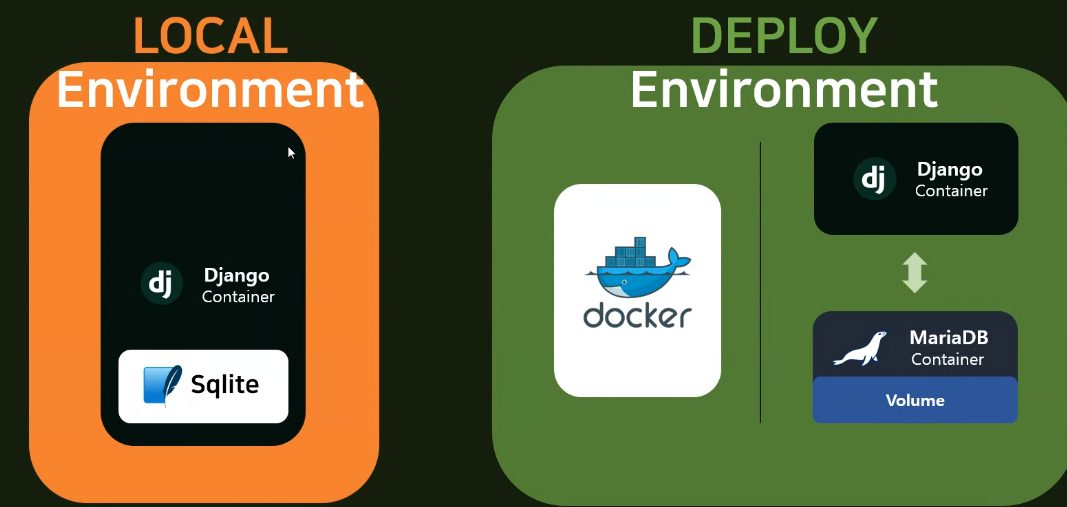

https://hub.docker.com/_/mariadb

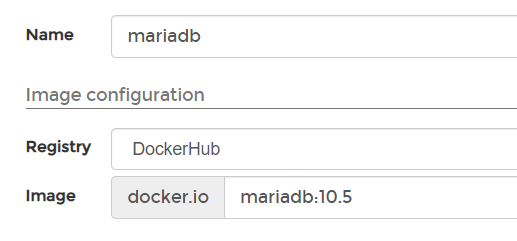

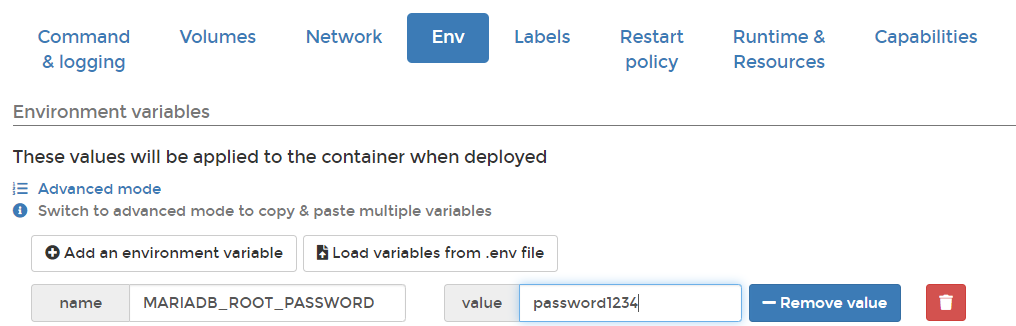

gsweb에 파이썬 패키지를 만들어주고 seetings.py를 옮겨준 후 base로 이름을 바꿔준다.  
local, deploy 파일을 각각 만든다. 모두 py  


In [ ]:
# gsweb/settings/base.py
BASE_DIR = Path(__file__).resolve().parent.parent.parent  # 패키지 파일 안에 넣어줬기 때문에 .parent 추가!


# gsweb/settings/deploy.py

from .base import *       # 중요!

local_env=open(os.path.join(BASE_DIR, '.env')) #base_dir가 프로젝트 경로를 의미,

env_list=dict()

while True:
    line=local_env.readline()
    if not line:
        break
    line=line.replace('\n','')
    start=line.find('=')
    key=line[:start]
    value=line[start+1:]
    env_list[key]=value


# Quick-start development settings - unsuitable for production
# See https://docs.djangoproject.com/en/3.2/howto/deployment/checklist/

# SECURITY WARNING: keep the secret key used in production secret!
SECRET_KEY = env_list['SECRET_KEY']

# SECURITY WARNING: don't run with debug turned on in production!
DEBUG = False         # False로 해주어야 debug가 안뜬다!!

ALLOWED_HOSTS = ["*"]

# Database
# https://docs.djangoproject.com/en/3.2/ref/settings/#databases

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.mysql',
        'NAME': 'django',
        'USER': 'django',
        'PASSWORD': 'password1234',
        'HOST': 'mariadb',
        'PORT': '3306',
    }
}
# databases는 마리아 db를 사용할 것이기 때문에!!

In [ ]:
# gsweb/settings/local.py
from .base import *

local_env=open(os.path.join(BASE_DIR, '.env')) #base_dir가 프로젝트 경로를 의미,

env_list=dict()

while True:
    line=local_env.readline()
    if not line:
        break
    line=line.replace('\n','')
    start=line.find('=')
    key=line[:start]
    value=line[start+1:]
    env_list[key]=value


# Quick-start development settings - unsuitable for production
# See https://docs.djangoproject.com/en/3.2/howto/deployment/checklist/

# SECURITY WARNING: keep the secret key used in production secret!
SECRET_KEY = env_list['SECRET_KEY']

# SECURITY WARNING: don't run with debug turned on in production!
DEBUG = True

ALLOWED_HOSTS = ["*"]

# Database
# https://docs.djangoproject.com/en/3.2/ref/settings/#databases

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }
}

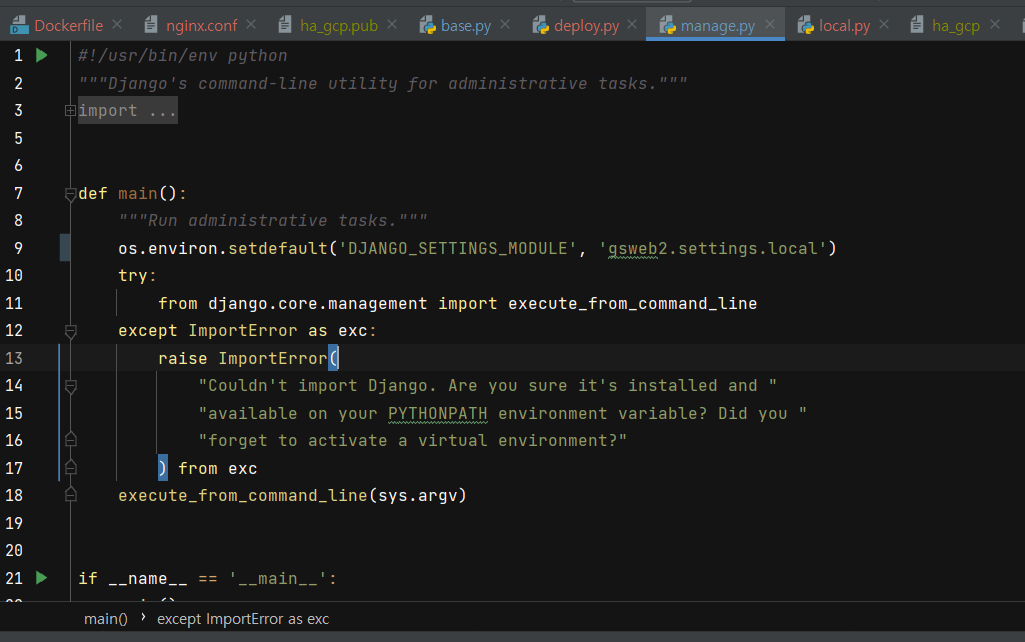

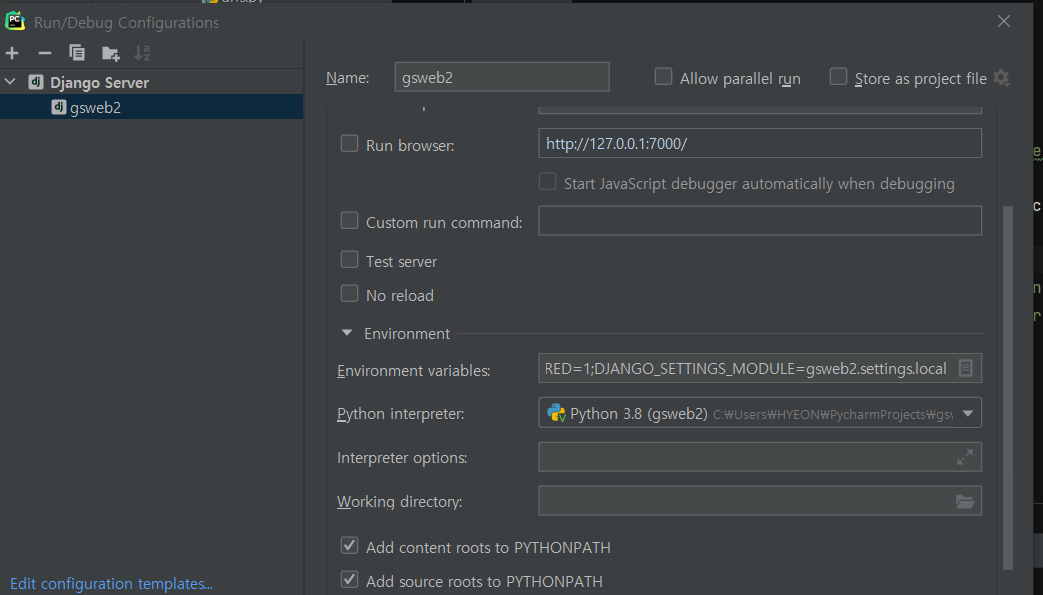